In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns

In [11]:
df = pd.read_csv('nyc_bird_data_Mar_2020.txt', sep="\t")

In [12]:
df['COUNTY'].unique()

array(['New York'], dtype=object)

# **Initial Data Exploration:**

In [13]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,BREEDING BIRD ATLAS CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 46
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,2019-07-19 10:29:34,33194,species,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,2019-07-19 10:15:03,5892,species,Least Sandpiper,Calidris minutilla,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,2019-07-19 10:29:37,23153,species,Barn Swallow,Hirundo rustica,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,2019-07-19 10:29:35,26287,species,Carolina Wren,Thryothorus ludovicianus,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,2019-07-19 10:29:36,32501,species,Red-winged Blackbird,Agelaius phoeniceus,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN


In [14]:
df.shape

(1699064, 47)

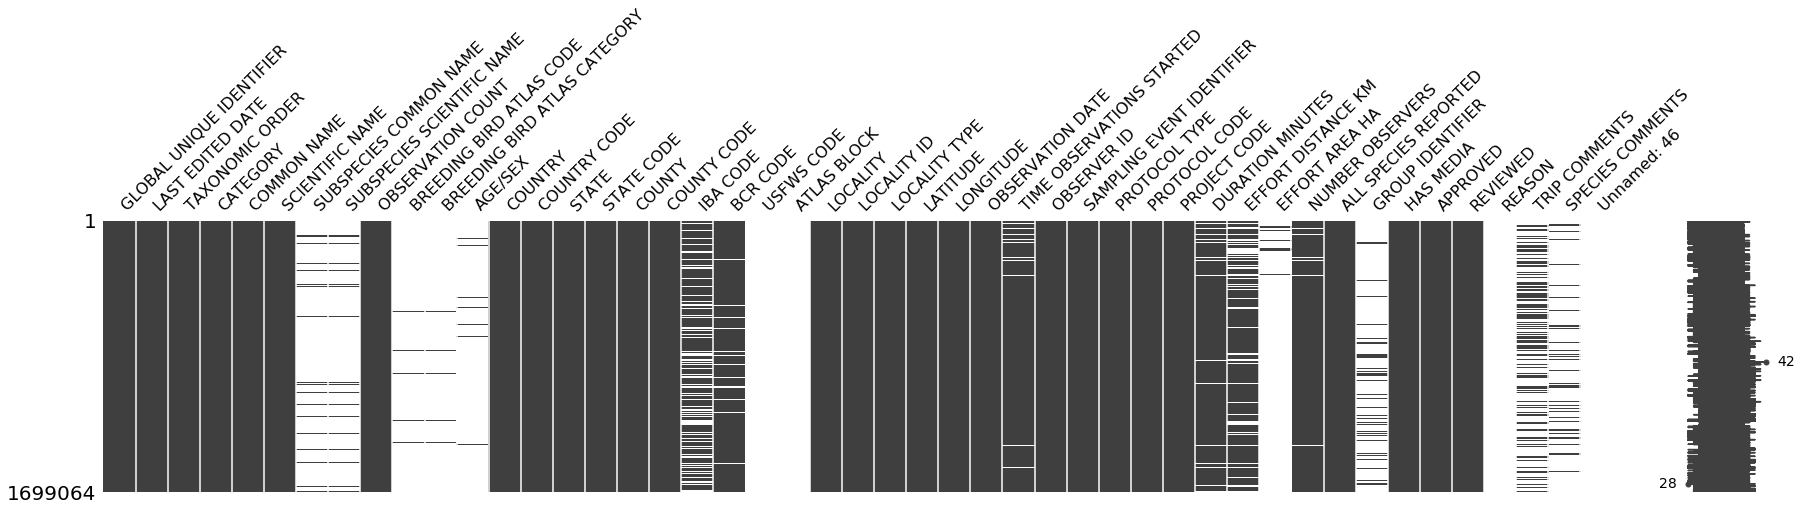

In [15]:
#Visualize Missing Values

import missingno as msno
%matplotlib inline

# How many missing values are there in our dataset?
msno.matrix(df, figsize = (30,5))

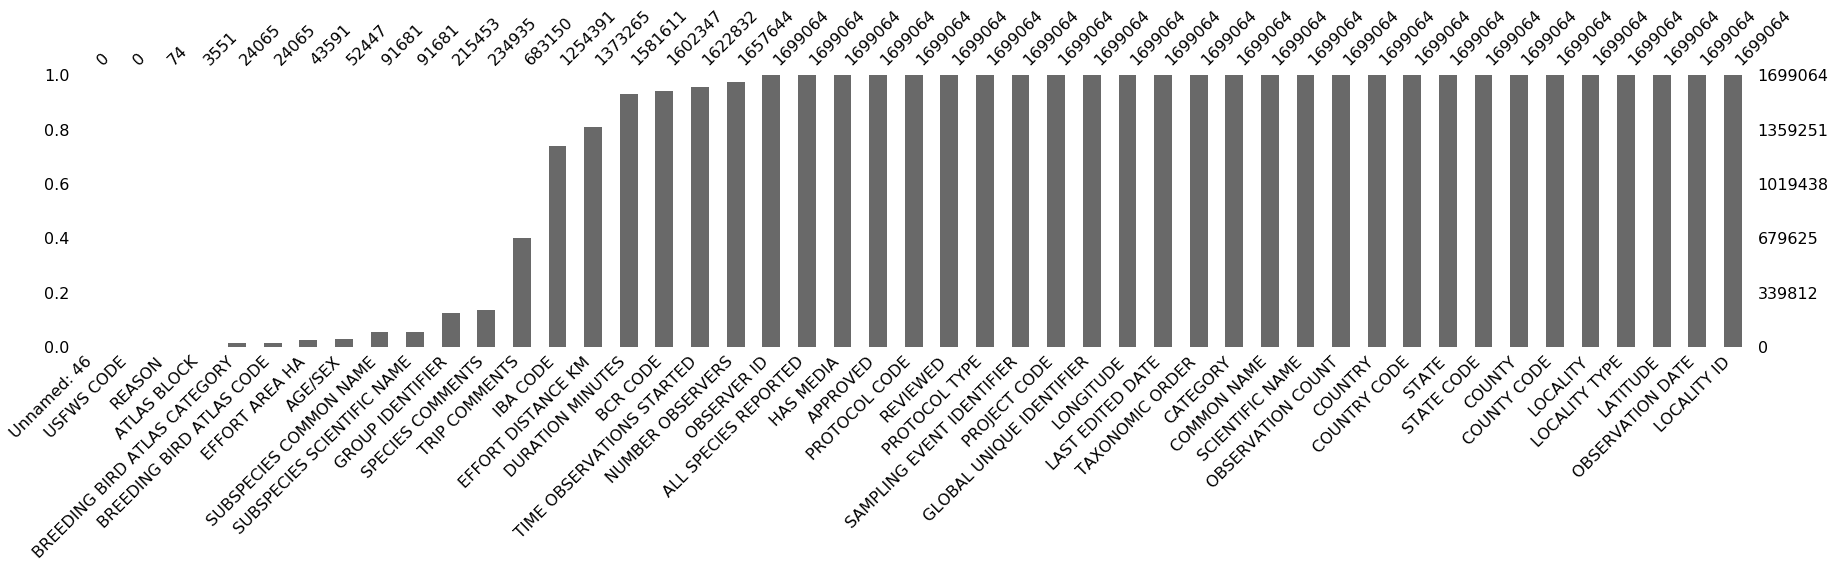

In [16]:
#Visualize features ascending by number of missing values. Should remove most.
msno.bar(df, sort='ascending', figsize = (30,5))

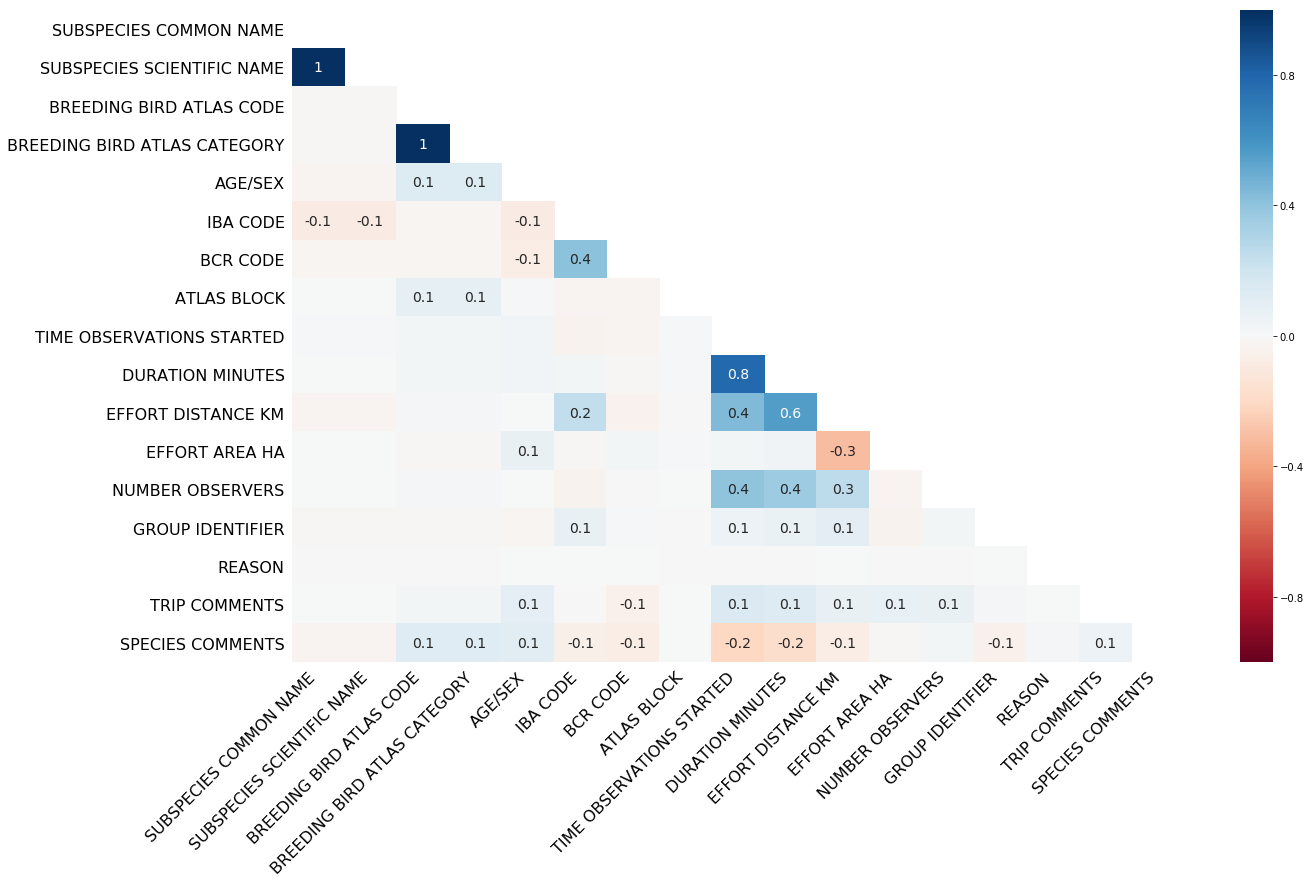

In [18]:
msno.heatmap(df)

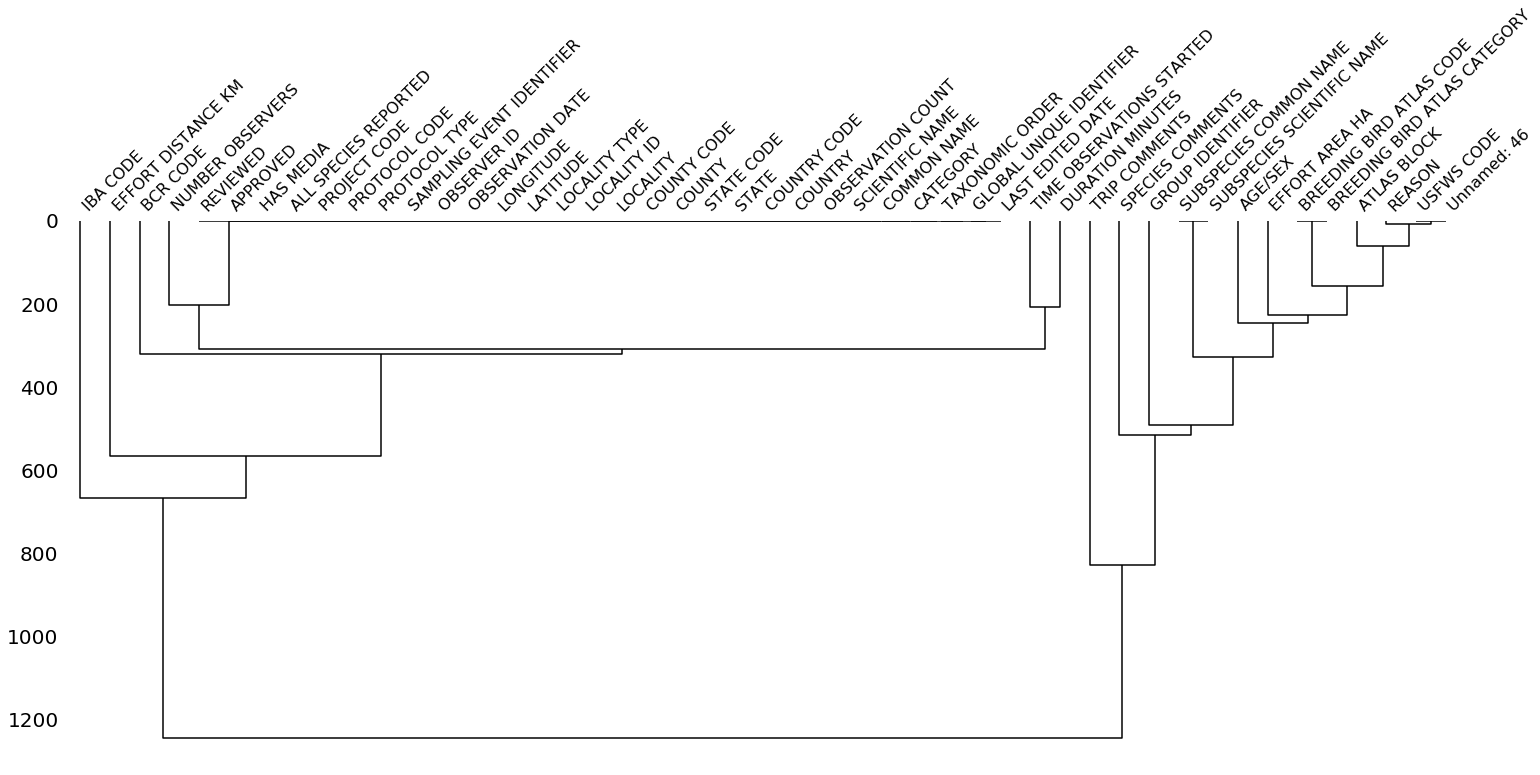

In [19]:
 msno.dendrogram(df)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699064 entries, 0 to 1699063
Data columns (total 47 columns):
GLOBAL UNIQUE IDENTIFIER        object
LAST EDITED DATE                object
TAXONOMIC ORDER                 int64
CATEGORY                        object
COMMON NAME                     object
SCIENTIFIC NAME                 object
SUBSPECIES COMMON NAME          object
SUBSPECIES SCIENTIFIC NAME      object
OBSERVATION COUNT               object
BREEDING BIRD ATLAS CODE        object
BREEDING BIRD ATLAS CATEGORY    object
AGE/SEX                         object
COUNTRY                         object
COUNTRY CODE                    object
STATE                           object
STATE CODE                      object
COUNTY                          object
COUNTY CODE                     object
IBA CODE                        object
BCR CODE                        float64
USFWS CODE                      float64
ATLAS BLOCK                     object
LOCALITY                    

In [8]:
# Any columns with over 1.6M missing values will be removed because it will be meaningless within the context of this large dataset.
print(df.isna().sum())

GLOBAL UNIQUE IDENTIFIER              0
LAST EDITED DATE                      0
TAXONOMIC ORDER                       0
CATEGORY                              0
COMMON NAME                           0
SCIENTIFIC NAME                       0
SUBSPECIES COMMON NAME          1607383
SUBSPECIES SCIENTIFIC NAME      1607383
OBSERVATION COUNT                     0
BREEDING BIRD ATLAS CODE        1674999
BREEDING BIRD ATLAS CATEGORY    1674999
AGE/SEX                         1646617
COUNTRY                               0
COUNTRY CODE                          0
STATE                                 0
STATE CODE                            0
COUNTY                                0
COUNTY CODE                           0
IBA CODE                         444673
BCR CODE                          96717
USFWS CODE                      1699064
ATLAS BLOCK                     1695513
LOCALITY                              0
LOCALITY ID                           0
LOCALITY TYPE                         0


In [9]:
#This function will allow us to plot different columns and subsets of columns as needed for EDA:

def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    #set up the seaborn style. 
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    
    #math.ceil() : Python number method ceil() returns ceiling value of x - the smallest integer not less than x.
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    
    #math.ceil() : Python number method ceil() returns ceiling value of x - the smallest integer not less than x.
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    #Determine vizualization type based on the data types!
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
# plot_distribution(observation_count, cols=1, width=20, height=20, hspace=0.45, wspace=0.5)

# Convert to Datetime:


In [10]:
# Check the current formatting
df['OBSERVATION DATE'].sample()

847749    2016-10-25
Name: OBSERVATION DATE, dtype: object

In [11]:
# convert column to datetime
df['OBSERVATION_DATE'] = pd.to_datetime(df['OBSERVATION DATE'])

In [12]:
observation_date = df[['OBSERVATION DATE']]

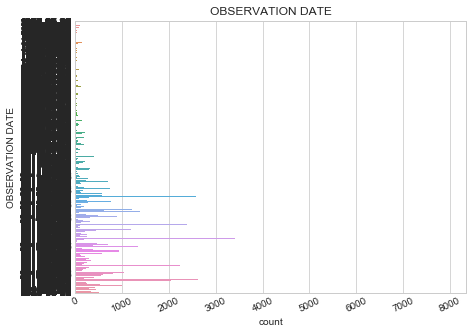

In [13]:
plot_distribution(observation_date, cols=1, width=7, height=5, hspace=0.45, wspace=0.5)

In [14]:
# create month and year columns
df['MONTH'] = pd.DatetimeIndex(df['OBSERVATION_DATE']).month
df['YEAR'] = pd.DatetimeIndex(df['OBSERVATION_DATE']).year

# IMPUTATION

After removing all values 1.6M + missing.

**OBSERVATION COUNT**

This needs to be numeric column so we need to first covert the 'X' into a number.

In [15]:
#Currently Observation Count is an object instead of numeric
df['OBSERVATION COUNT'].sample()

1509316    3
Name: OBSERVATION COUNT, dtype: object

In [16]:
#We can see that 'X' is the THIRD most popular choice
df['OBSERVATION COUNT'].value_counts().head(10)

1     526989
2     259059
X     206352
3     126040
4      96053
5      70508
6      57157
8      38669
10     38244
7      26346
Name: OBSERVATION COUNT, dtype: int64

In [17]:
#We will fill all the 'X' values with 1, assuming that each sighting included at LEAST 1 bird
df['OBSERVATION_COUNT'] = df['OBSERVATION COUNT'].replace('X', '1')


In [18]:
#convert OBSERVATION COUNT into a numerica value (currently an object, above)
df['OBSERVATION_COUNT'] = pd.to_numeric(df['OBSERVATION_COUNT'])

In [19]:
#Turn into dataframe for viz
observation_count = df[['OBSERVATION_COUNT']]

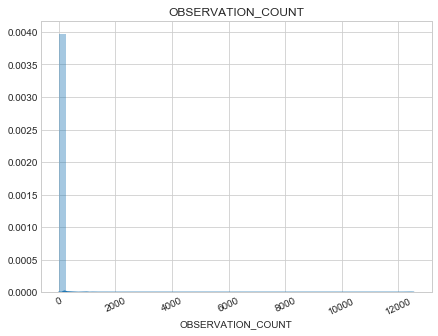

In [20]:
plot_distribution(observation_count, cols=1, width=7, height=5, hspace=0.45, wspace=0.5)

**NUMBER OBSERVERS**

There are 41420 missing values. I want to check if most of the data for this feature began being captured before or after advent of smartphones before making a determination about how to handle. If it is just after 2005, then all analysis with this feature will be on recent data only.

In [21]:
df['NUMBER OBSERVERS'].value_counts()

1.0       1097133
2.0        239024
3.0         66283
15.0        35771
4.0         29966
10.0        27255
12.0        22647
20.0        19478
5.0         17836
8.0         13718
6.0         11454
7.0          9264
16.0         8911
14.0         8374
9.0          8033
11.0         6789
18.0         5782
13.0         5315
25.0         4279
30.0         4082
17.0         3150
40.0         1876
22.0         1302
19.0         1195
21.0         1114
35.0          928
24.0          915
50.0          860
28.0          751
38.0          565
           ...   
60.0          474
26.0          403
27.0          327
44.0          272
29.0          236
32.0          235
33.0          158
45.0          121
75.0          112
100.0         104
34.0           97
201.0          71
37.0           68
36.0           47
55.0           37
126.0          35
90.0           35
41.0           34
70.0           33
63.0           32
102.0          32
76.0           27
68.0           20
42.0           11
1432.0    

In [22]:
#The median is 1
df['NUMBER OBSERVERS'].median()

1.0

In [23]:
#Total missing values
df['NUMBER OBSERVERS'].isna().sum()

41420

In [24]:
#perform inputation
df['NUMBER OBSERVERS'] = df['NUMBER OBSERVERS'].fillna(1)

In [25]:
# Review missing data to make sure it was successful
df['NUMBER OBSERVERS'].isna().sum()

0

In [26]:
#turn into dataframe for viz
num_observers = df[['NUMBER OBSERVERS']]

In [27]:
num_observers.describe()

,NUMBER OBSERVERS
count,1.699064e+06
mean,2.982697e+00
std,6.359018e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.432000e+03


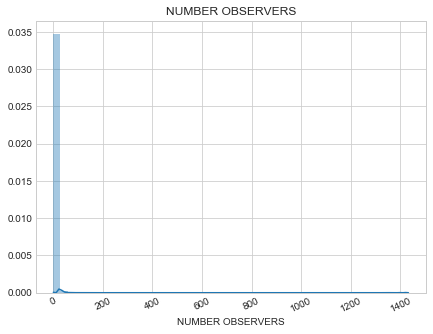

In [28]:
plot_distribution(num_observers, cols=1, width=7, height=5, hspace=0.45, wspace=0.5)

**TEXT FEATURES**

All NAN values will be replaced with 'NONE'

In [29]:
print('MISSING TRIP COMMENTS', df['TRIP COMMENTS'].isna().sum())
print('MISSING SPECIES COMMENTS', df['SPECIES COMMENTS'].isna().sum())

MISSING TRIP COMMENTS 1015914
MISSING SPECIES COMMENTS 1464129


In [30]:
#Impute values

df['TRIP COMMENTS'] = df['TRIP COMMENTS'].fillna('NONE')
df['SPECIES COMMENTS'] = df['SPECIES COMMENTS'].fillna('NONE')

In [31]:
print('MISSING TRIP COMMENTS', df['TRIP COMMENTS'].isna().sum())
print('MISSING SPECIES COMMENTS', df['SPECIES COMMENTS'].isna().sum())

MISSING TRIP COMMENTS 0
MISSING SPECIES COMMENTS 0


**DURATION MINUTES**

There are 117453 missing values. I want to check if most of the data for this feature began being captured before or after advent of smartphones before making a determination about how to handle. If it is just after 2005, then all analysis with this feature will be on recent data only.

In [32]:
#Median viewing lasts 105 minutes
df['DURATION MINUTES'].median()

105.0

In [33]:
#review count of each duration minutes column per year
#There are more recordings for this feature more recently

med_min_by_year = df.groupby(df['YEAR'])['DURATION MINUTES'].median()

In [34]:
# df['DURATION MINUTES'] = df['DURATION MINUTES'].fillna(0)

In [35]:
type(med_min_by_year)
med_min_by_year_df = med_min_by_year.to_frame()

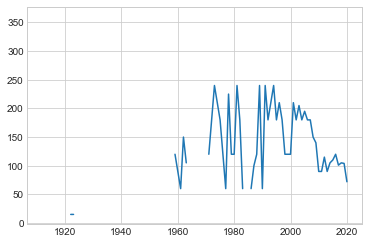

In [55]:
#While not the best way to show this data, it shows the significant gaps in data. 
plt.plot(med_min_by_year_df)

plt.show()


# **Exploring Individual Features:**

**CATEGORY:** The category (e.g., species, hybrid, slash) assigned to this taxon in the eBird/Clements taxonomy.

- Species: e.g., Tundra Swan

- Hybrid: Hybrid between two species, e.g., Tundra x Trumpeter Swan (hybrid)

- Intergrade: Hybrid between two subspecies or subspecies groups, e.g., Tundra Swan (Whistling x Bewick’s) 

- Spuh:  Genus or identification at broad level, e.g., swan sp.

- Slash: Identification to Species-pair, e.g., Tundra/Trumpeter Swan

- Domestic: Distinctly-plumaged domesticated varieties that may be free-flying (these do not count on personal lists) e.g., Mallard (Domestic type)

- Form: Miscellaneous other taxa, including recently-described species yet to be accepted or distinctive forms that are not universally accepted, e.g., Red-tailed Hawk (abieticola), Upland Goose (Bar-breasted)

In [56]:
#Review all individual categories

print(df['CATEGORY'].unique())

['species' 'form' 'domestic' 'slash' 'spuh' 'issf' 'hybrid']


In [57]:
category_groups = df.groupby(df['CATEGORY']).count()

In [58]:
category_groups

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,BREEDING BIRD ATLAS CODE,BREEDING BIRD ATLAS CATEGORY,...,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 46,OBSERVATION_DATE,MONTH,YEAR,OBSERVATION_COUNT
CATEGORY,,,,,,,,,,,,,,,,,,,,,
domestic,59483,59483,59483,59483,59483,59053,59053,59483,460,460,...,59483,59483,0,59483,59483,0,59483,59483,59483,59483
form,2838,2838,2838,2838,2838,2838,2838,2838,4,4,...,2838,2838,0,2838,2838,0,2838,2838,2838,2838
hybrid,1276,1276,1276,1276,1276,0,0,1276,4,4,...,1276,1276,0,1276,1276,0,1276,1276,1276,1276
issf,29790,29790,29790,29790,29790,29790,29790,29790,475,475,...,29790,29790,0,29790,29790,0,29790,29790,29790,29790
slash,1005,1005,1005,1005,1005,0,0,1005,6,6,...,1005,1005,0,1005,1005,0,1005,1005,1005,1005
species,1587872,1587872,1587872,1587872,1587872,0,0,1587872,22537,22537,...,1587872,1587872,74,1587872,1587872,0,1587872,1587872,1587872,1587872
spuh,16800,16800,16800,16800,16800,0,0,16800,579,579,...,16800,16800,0,16800,16800,0,16800,16800,16800,16800


**COMMON NAME**: 

In [59]:
#Review all species
total_species = len(df['COMMON NAME'].unique())
print(f'There are {total_species} total species')

There are 442 total species


In [60]:
df['COMMON NAME'].sample(30)

1591547            Yellow-billed Cuckoo
21153                       House Finch
1675095                   Mourning Dove
542473              American Black Duck
486014                  Northern Parula
1149426          Red-bellied Woodpecker
545694                    Hermit Thrush
74967                 Northern Cardinal
1066784         White-breasted Nuthatch
482601                    Mourning Dove
520154                       House Wren
1536733                     Great Egret
1055075                 Dark-eyed Junco
263593                    American Crow
140588                         Ovenbird
113403                 Chipping Sparrow
884197                  Dark-eyed Junco
623969              Common Yellowthroat
1438729                 Tufted Titmouse
1570118                  Common Grackle
1176966    Black-throated Green Warbler
1696937                    Song Sparrow
568559                      Rock Pigeon
237532                    House Sparrow
622557                   Common Grackle


In [61]:
#Exploration for a single species
wt_sparrow = df[df['COMMON NAME'] == 'White-throated Sparrow']

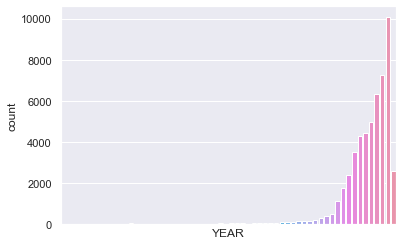

In [62]:
#Reveal general trend of sightings over time

import seaborn as sns
import matplotlib.dates as mdates

sns.set(style="darkgrid")

ax = sns.countplot(x="YEAR", data=wt_sparrow)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#There are WAY more overall sightings recently. Need to investigate more.

**LOCALITY**

The reported location name for the observation. Observers can give locations their own names, or choose from existing locations

FEATURE ENGINEERING: Convert into another boolean column Park/Street 

In [63]:
df['LOCALITY'].value_counts().head(10)

Central Park                                        600195
Central Park--The Ramble                            275243
Central Park--North End                              69665
Inwood Hill Park                                     59456
Central Park--Reservoir                              45767
Manhattan--414 E 52nd St.                            45171
Governors Island (closed to public Nov-Apr 2020)     36326
Central Park--Strawberry Field                       23544
Bryant Park                                          23112
Central Park--The Pond and Hallett Sanctuary         23033
Name: LOCALITY, dtype: int64

**LOCALITY TYPE**

This code is meant to help define the type of location used, as participants in eBird can plot specific locations on a map (P), choose existing locations from a map (H), or choose to submit data for a town (T), postal code (PC), county (C), or state (S). Abbreviations: State (S), County (C), Postal/Zip Code (PC), Town (T), Hotspot (H), Personal (P).

In [64]:
df['LOCALITY TYPE'].unique()

array(['P', 'T', 'H', 'PC'], dtype=object)

In [65]:
df['LOCALITY TYPE'].value_counts()

H     1503578
P      185644
PC       8865
T         977
Name: LOCALITY TYPE, dtype: int64

In [66]:
locality_type = df[['LOCALITY TYPE']]

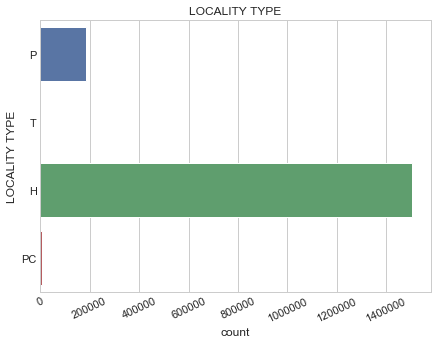

In [67]:
plot_distribution(locality_type, cols=1, width=7, height=5, hspace=0.45, wspace=0.5)

**HAS MEDIA**

Boolean value, refers to whether a particular observation is supported by rich media stored at the Cornell Lab of Ornithology's Macaulay Library.

FEATURE ENGINEERING: Might be interesting to note user trends over time.

In [69]:
df['HAS MEDIA'].value_counts()

0    1670733
1      28331
Name: HAS MEDIA, dtype: int64

# Final Dataframe for Analysis:


The final dataframe will contain:

Original Columns:
- GLOBAL UNIQUE IDENTIFIER
- CATEGORY
- COMMON NAME
- OBSERVATION COUNT
- LATITUDE
- LONGITUDE
- OBSERVER ID
- NUMBER OBSERVERS

- TRIP COMMENTS
- SPECIED COMMENTS
- APPROVED

Created Columns:
- OBSERVATION_DATE
- MONTH
- YEAR

In [76]:
data = df[['GLOBAL UNIQUE IDENTIFIER', 'CATEGORY', 'COMMON NAME', 'OBSERVATION_COUNT', 'LOCALITY', 'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE','OBSERVATION_DATE','MONTH', 'YEAR', 'OBSERVER ID', 'DURATION MINUTES', 'NUMBER OBSERVERS', 'HAS MEDIA','TRIP COMMENTS', 'SPECIES COMMENTS','APPROVED']]

In [77]:
data.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LOCALITY,LOCALITY TYPE,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,HAS MEDIA,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,Arlington Alex Co.,P,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,1.0,0,NONE,NONE,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,Little River Arlington Alex Co.,P,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,1.0,0,NONE,NONE,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,Arlington Alex Co.,P,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,1.0,0,NONE,NONE,1


In [78]:
data.to_csv('nyc_birds_full.csv', index=False)